In [ ]:
!pip install -r requirements.txt

     ---------------------------------------- 0.0/59.7 kB ? eta -:--:--
     ------------- ------------------------ 20.5/59.7 kB 640.0 kB/s eta 0:00:01
     -------------------------------------- 59.7/59.7 kB 798.4 kB/s eta 0:00:00
  Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-win_amd64.whl (15.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
paddlex 3.0.1 requires numpy==1.24.4; python_version < "3.12", but you have numpy 1.26.4 which is incompatible.


In [ ]:
!python -m pip install paddlepaddle==3.0.0 -i https://www.paddlepaddle.org.cn/packages/stable/cpu/

Looking in indexes: https://www.paddlepaddle.org.cn/packages/stable/cpu/


In [ ]:
!python -m pip install paddleocr

  Using cached numpy-1.24.4-cp311-cp311-win_amd64.whl.metadata (5.6 kB)
Using cached numpy-1.24.4-cp311-cp311-win_amd64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
jax 0.5.2 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.24.4 which is incompatible.
tensorflow-intel 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 1.24.4 which is incompatible.


In [ ]:
!pip show paddleocr

Name: paddleocr
Version: 3.0.1
Summary: Awesome OCR toolkit based on PaddlePaddle
Home-page: 
Author: 
Author-email: PaddlePaddle <Paddle-better@baidu.com>
License: Apache License 2.0
Location: C:\Users\phamd\anaconda3\Lib\site-packages
Requires: paddlex, PyYAML, typing-extensions
Required-by: 


In [ ]:
!pip install gTTS

### PaddleOCR cho 1 chữ cái

#### Full version + sound

In [ ]:
from paddleocr import PaddleOCR
from gtts import gTTS
import os

# Khởi tạo OCR
ocr = PaddleOCR(
    use_doc_orientation_classify=False,
    use_doc_unwarping=False,
    use_textline_orientation=False
)

# Chạy OCR
result = ocr.predict("A.jpg")

# Gộp toàn bộ text được nhận diện
all_text = ""
for res in result:
    res.print()
    res.save_to_img("A_output/A_full.jpg")
    res.save_to_json("A_output/A_full.json")

    for line in res:
        line_text = line[1][0]  # lấy chuỗi văn bản từ kết quả OCR
        all_text += line_text + ". "

# Tạo file âm thanh từ text
if all_text.strip():
    tts = gTTS(text=all_text, lang='en')  # hoặc 'vi' nếu là tiếng Việt
    tts.save("A_output/A_full_audio.mp3")
    print("Đã lưu âm thanh vào A_output/A_full_audio.mp3")
else:
    print("Không có văn bản nhận diện được để tạo âm thanh.")

Creating model: ('PP-OCRv5_server_det', None)
Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in C:\Users\phamd\.paddlex\official_models.
c:\Users\phamd\anaconda3\Lib\site-packages\paddle\utils\cpp_extension\extension_utils.py:711: UserWarning: No ccache found. Please be aware that recompiling all source files may be required. You can download and install ccache from: https://github.com/ccache/ccache/blob/master/doc/INSTALL.md
  warnings.warn(warning_message)
Creating model: ('PP-OCRv5_server_rec', None)
Using official model (PP-OCRv5_server_rec), the model files will be automatically downloaded and saved in C:\Users\phamd\.paddlex\official_models.
{'res': {'input_path': 'A.jpg', 'page_index': None, 'model_settings': {'use_doc_preprocessor': True, 'use_textline_orientation': False}, 'doc_preprocessor_res': {'input_path': None, 'page_index': None, 'model_settings': {'use_doc_orientation_classify': False, 'use_doc_unwarping': False},

Đã lưu âm thanh vào A_output/A_full_audio.mp3


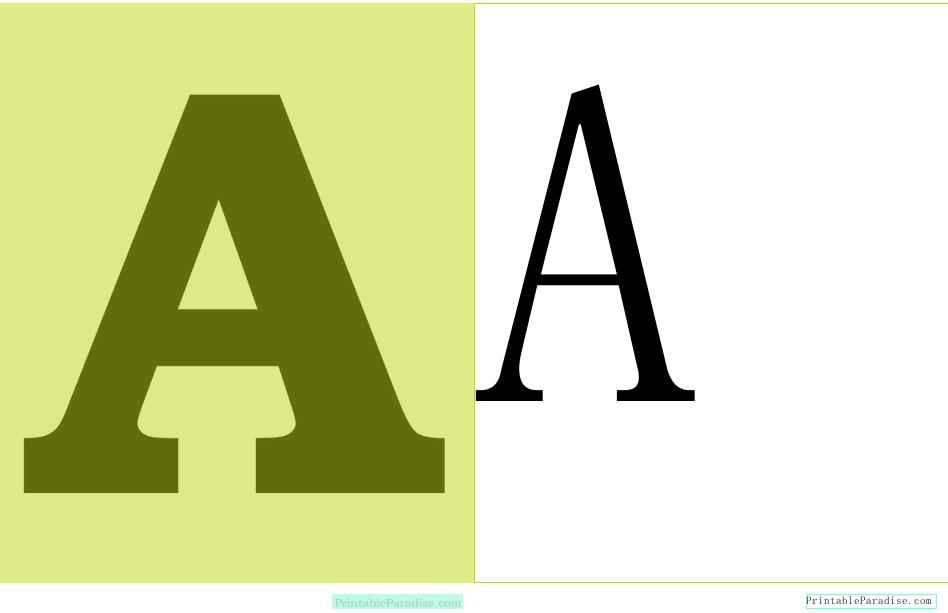

In [ ]:
from PIL import Image
image = Image.open("A_output/A_full.jpg")
image

#### Text Detection

In [ ]:
from paddleocr import TextDetection

model = TextDetection()
output = model.predict("A.jpg")
for res in output:
    res.print()
    res.save_to_img(save_path="A_output/A_det.jpg")
    res.save_to_json(save_path="A_output/A_det.json")

Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in C:\Users\phamd\.paddlex\official_models.
{'res': {'input_path': 'A.jpg', 'page_index': None, 'dt_polys': array([[[332, 594],
        ...,
        [332, 608]],

       [[  0,   3],
        ...,
        [  0, 582]]], dtype=int16), 'dt_scores': [0.7534125304376815, 0.8423271642578687]}}


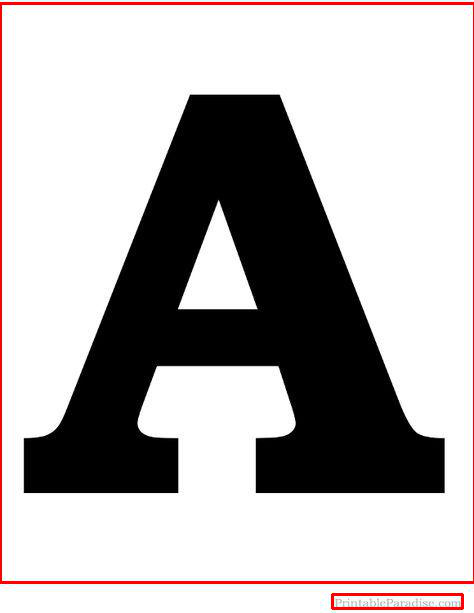

In [ ]:
image = Image.open("A_output/A_det.jpg")
image

#### Text Recognition

In [ ]:
from paddleocr import TextRecognition

model = TextRecognition()
output = model.predict(input="A.jpg")
for res in output:
    res.print()
    res.save_to_img(save_path="A_output/A_rec.jpg")
    res.save_to_json(save_path="A_output/A_rec.json")

Using official model (PP-OCRv5_server_rec), the model files will be automatically downloaded and saved in C:\Users\phamd\.paddlex\official_models.
{'res': {'input_path': 'A.jpg', 'page_index': None, 'rec_text': 'A', 'rec_score': 0.9819087982177734}}


### PaddleOCR cho 1 hóa đơn

#### Full version + sound

In [ ]:
from paddleocr import PaddleOCR
from gtts import gTTS
import os

# Khởi tạo OCR
ocr = PaddleOCR(
    use_doc_orientation_classify=False,
    use_doc_unwarping=False,
    use_textline_orientation=False
)

# Chạy OCR
result = ocr.predict("bill.jpg")

# Gộp toàn bộ text được nhận diện
all_text = ""
for res in result:
    res.print()
    res.save_to_img("bill_output/bill_full.jpg")
    res.save_to_json("bill_output/bill_full.json")

Creating model: ('PP-OCRv5_server_det', None)
Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in C:\Users\phamd\.paddlex\official_models.
Creating model: ('PP-OCRv5_server_rec', None)
Using official model (PP-OCRv5_server_rec), the model files will be automatically downloaded and saved in C:\Users\phamd\.paddlex\official_models.
{'res': {'input_path': 'bill.jpg', 'page_index': None, 'model_settings': {'use_doc_preprocessor': True, 'use_textline_orientation': False}, 'doc_preprocessor_res': {'input_path': None, 'page_index': None, 'model_settings': {'use_doc_orientation_classify': False, 'use_doc_unwarping': False}, 'angle': -1}, 'dt_polys': array([[[755,  26],
        ...,
        [755,  57]],

       ...,

       [[317, 650],
        ...,
        [317, 671]]], dtype=int16), 'text_det_params': {'limit_side_len': 64, 'limit_type': 'min', 'thresh': 0.3, 'max_side_limit': 4000, 'box_thresh': 0.6, 'unclip_ratio': 1.5}, 'text_type': 'ge

In [ ]:
import json
# Đường dẫn tới file JSON đã lưu từ OCR
json_path = "bill_output/bill_full.json"

# Đọc file JSON
with open(json_path, "r", encoding="utf-8") as f:
    data = json.load(f)

# Lấy danh sách văn bản từ trường 'rec_texts'
rec_texts = data.get("rec_texts", [])

# In từng dòng ra màn hình
print("Văn bản được OCR nhận diện:")
for rec_text in rec_texts:
    print("-", rec_text)

# Gộp các dòng văn bản thành một đoạn text dài
all_text = ". ".join(rec_texts)

# Chuyển văn bản thành giọng nói
if all_text.strip():
    # Tạo thư mục nếu chưa có
    os.makedirs("bill_output", exist_ok=True)

    tts = gTTS(text=all_text, lang='en')
    tts.save("bill_output/bill_full_audio (paddleocr).mp3")
    print("\nĐã lưu file âm thanh vào bill_output/bill_full_audio (paddleocr).mp3")
else:
    print("Không có văn bản để chuyển thành giọng nói.")

Văn bản được OCR nhận diện:
- INVOICE
- My Company
- Invoice Number:INV-1258
- Gregory E. Willis
- PO Number:
- 6258 Amesbury St
- Invoice Date: 24-Dec-2012
- San Diego, CA 92114
- Due Date:23-Jan-2013
- Germany
- Balance Due: $ 50.00
- example@example.com
- Bill To  Robert Son
- Ship To Robert Son
- 799 E DRAGRAM SUITE 5A
- 799EDRAGRAMSUITE5A
- TUCSON AZ 85705
- TUCSON AZ 85705
- United States of America
- United States of America
- QTY
- PRODUCT
- DESCRIPTION
- UNIT
- PRICE
- LINE TOTAL
- 1.00
- Website Design
- Website Design
- $50.00
- $ 50.00
- SUB
- daily terms10
- TOTAL
- $ 50.00
- TAX
- $0.00
- FEE
- $0.00
- DISCOUNT
- $0.00
- TOTAL
- $ 50.00
- PAYMENTS
- $0.00
- BALANCE
- $ 50.00
- Make all checks payable to My Company
- Thank you for your business- Payment due in 30 days

Đã lưu file âm thanh vào bill_output/bill_full_audio (paddleocr).mp3


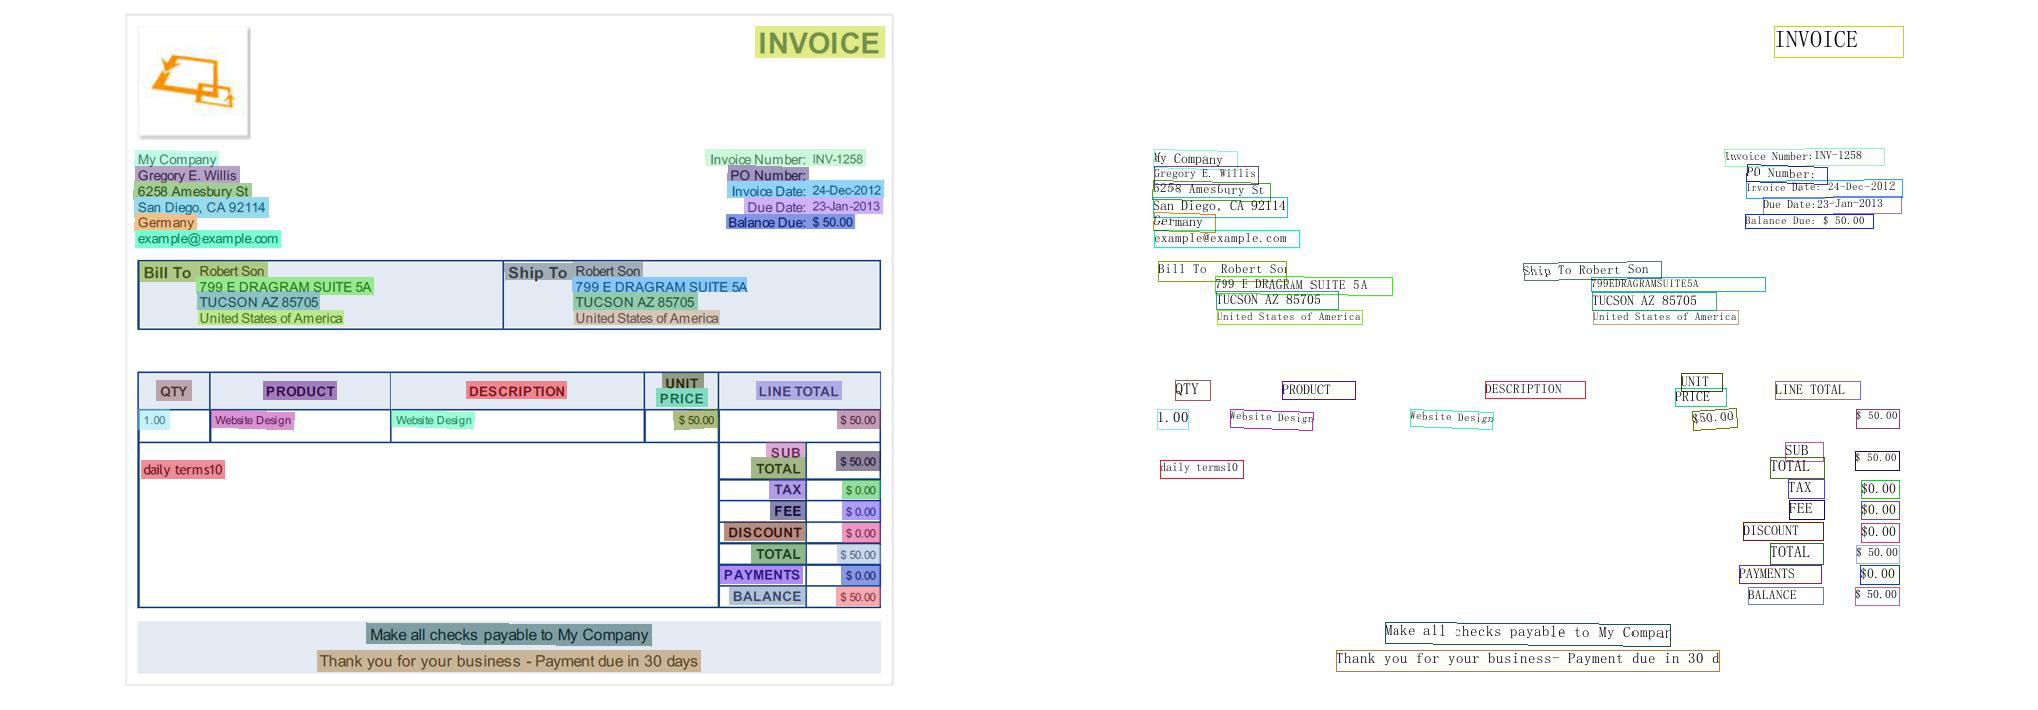

In [ ]:
image = Image.open("bill_output/bill_full.jpg")
image

#### Text Detection

In [ ]:
from paddleocr import TextDetection
model = TextDetection()
output = model.predict("bill.jpg")
for res in output:
    res.print()
    res.save_to_img(save_path="bill_output/bill_det.jpg")
    res.save_to_json(save_path="bill_output/bill_det.json")

Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in C:\Users\phamd\.paddlex\official_models.
{'res': {'input_path': 'bill.jpg', 'page_index': None, 'dt_polys': array([[[317, 650],
        ...,
        [317, 671]],

       ...,

       [[755,  25],
        ...,
        [755,  58]]], dtype=int16), 'dt_scores': [0.8788807072546404, 0.8381185273875479, 0.8909558992729418, 0.9720813478266851, 0.8865622539828253, 0.9885689625458688, 0.8814244602221555, 0.9086365227579561, 0.9787585124097488, 0.9544979759850182, 0.933766452147177, 0.8975881764975687, 0.946695670994938, 0.9666895014233887, 0.8986872227751124, 0.9617830303211051, 0.881275993946474, 0.9023033222390546, 0.926629627391877, 0.8143387592492731, 0.8397381617402383, 0.8847091732615674, 0.8792489391751588, 0.9590855326365542, 0.9871143316262189, 0.9582867938681644, 0.8612692410580235, 0.908736601125449, 0.8962073044410797, 0.965292228058308, 0.9376274203881622, 0.9335187826276061, 0

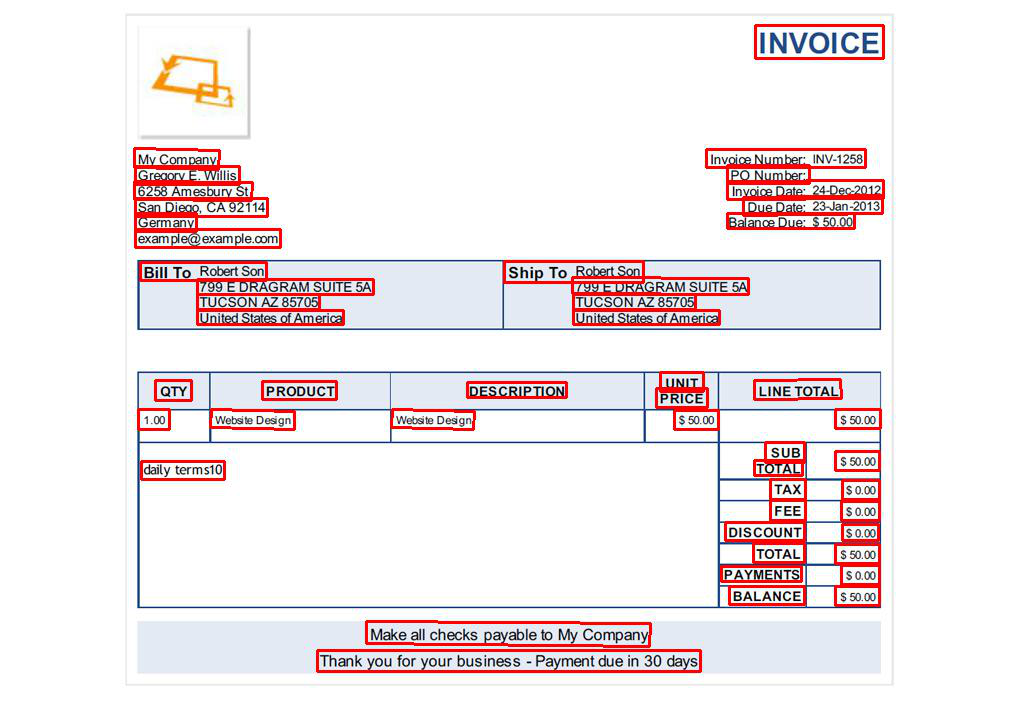

In [ ]:
image = Image.open("bill_output/bill_det.jpg")
image

#### Text Recognition

In [ ]:
from paddleocr import TextRecognition
model = TextRecognition()
output = model.predict(input="bill.jpg")
for res in output:
    res.print()
    res.save_to_img(save_path="bill_output/bill_rec.jpg")
    res.save_to_json(save_path="bill_output/bill_rec.json")

Using official model (PP-OCRv5_server_rec), the model files will be automatically downloaded and saved in C:\Users\phamd\.paddlex\official_models.
{'res': {'input_path': 'bill.jpg', 'page_index': None, 'rec_text': '', 'rec_score': 0.0}}


In [ ]:
!pip install prefixspan

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for prefixspan: filename=prefixspan-0.5.2-py3-none-any.whl size=11277 sha256=4073e6841de4ed592cdff54f19da99a5a1d41f0be0e04aee35372bcb1636a090
  Stored in directory: c:\users\phamd\appdata\local\pip\cache\wheels\95\1a\4a\d02ca86ccf55a25e07bd200a5320b8a584e5e2b75b1168f703
  Created wheel for docopt: filename=docopt-0.6.2-py2.py3-none-any.whl size=13773 sha256=31d05041681dacf3bb8d15792b6a639e4f35af5f30cef69a6af3a737f9c40546
  Stored in directory: c:\users\phamd\appdata\local\pip\cache\wheels\1a\b0\8c\4b75c4116c31f83c8f9f047231251e13cc74481cca4a78a9ce
  Created wheel for extratools: filename=extratools-0.8.2.1-py3-none-any.whl size=28929 sha256=9dec1dfb96f445caf7028675cd36b

#### Data Mining

In [ ]:
# Import thư viện
from paddleocr import PaddleOCR
from prefixspan import PrefixSpan
import pandas as pd
import os
import gc

In [ ]:
# Khởi tạo OCR
ocr = PaddleOCR(
    use_doc_orientation_classify=False,
    use_doc_unwarping=False,
    use_textline_orientation=False
)

Creating model: ('PP-OCRv5_server_det', None)
Using official model (PP-OCRv5_server_det), the model files will be automatically downloaded and saved in C:\Users\phamd\.paddlex\official_models.
Creating model: ('PP-OCRv5_server_rec', None)
Using official model (PP-OCRv5_server_rec), the model files will be automatically downloaded and saved in C:\Users\phamd\.paddlex\official_models.


In [ ]:
# Biến để lưu toàn bộ dữ liệu OCR từ hóa đơn
data = []

# Thư mục chứa ảnh hóa đơn
img_folder = "bills"

# Xử lý từng ảnh
for i in range(1, 11):
    img_path = f"{img_folder}/{i}.jpg"
    result = ocr.predict(img_path)

    # Lưu JSON
    json_path = f"bill_json_output/bill_{i}.json"
    for res in result:
        res.save_to_json(json_path)

    # Đọc lại JSON và lấy rec_texts
    with open(json_path, "r", encoding="utf-8") as f:
        ocr_data = json.load(f)
        bill_text = ocr_data.get("rec_texts", [])

    # Thêm vào dữ liệu chính
    data.append(bill_text)

    # Giải phóng bộ nhớ
    del result, bill_text, ocr_data
    gc.collect()

# Tạo DataFrame & lưu ra CSV
df = pd.DataFrame({'bill_id': list(range(1, 11)), 'items': data})
df.to_csv("bill_sequences (paddleocr).csv", index=False)

In [10]:
import pandas as pd
import re
import ast

# Đọc file gốc
df = pd.read_csv("/content/bill_sequences (paddleocr).csv")

skip_keywords = ['SUMMARY', 'VAT [%]', 'Net worth', 'VAT', 'Gross worth', 'Total', 'each', 'VAT[%]']

def is_price_line(s):
    s = str(s).strip()
    if re.search(r'(?i)hz', s):
        return False
    return bool(re.fullmatch(r'[\d\s]*[\.,]\d{2}', s)) or re.fullmatch(r'\d+%', s) or s.startswith('$')

def extract_items(invoice):
    i = 0
    items = []
    while i < len(invoice):
        if isinstance(invoice[i], str) and invoice[i].endswith('.') and invoice[i][:-1].isdigit():
            item_block = []
            i += 1
            while i < len(invoice) and not (invoice[i].endswith('.') and invoice[i][:-1].isdigit()):
                value = invoice[i]
                if value in skip_keywords or is_price_line(value):
                    i += 1
                    continue
                item_block.append(value)
                i += 1
            if item_block:
                # Nối các dòng của item thành 1 chuỗi
                items.append(" ".join(item_block))
        else:
            i += 1
    return items

# Duyệt từng hóa đơn, tạo DataFrame mới
rows = []
for index, row in df.iterrows():
    bill_id = row['bill_id']
    try:
        invoice = ast.literal_eval(row['items']) if isinstance(row['items'], str) else row['items']
    except Exception as e:
        print(f"[!] Lỗi dòng {bill_id}: {e}")
        continue

    items = extract_items(invoice)
    row_dict = {"bill_id": bill_id}
    for idx, item in enumerate(items, start=1):
        row_dict[f"item_{idx}"] = item
    rows.append(row_dict)

# Tạo DataFrame mới
new_df = pd.DataFrame(rows)

# Lưu lại thành file CSV mới
new_df.to_csv("/content/bill_sequences (paddleocr - edited).csv", index=False)
print("Đã lưu vào file: /content/bill_sequences (paddleocr - edited).csv")

Đã lưu vào file: /content/bill_sequences (paddleocr - edited).csv


In [ ]:
import pandas as pd
from prefixspan import PrefixSpan

# Đọc file CSV
df = pd.read_csv('/content/bill_sequences (paddleocr - edited).csv')

# Lấy danh sách các cột item
item_cols = [col for col in df.columns if col.startswith('item_')]

# Tạo list sequence từ từng dòng
sequences = df[item_cols].fillna('').values.tolist()
sequences = [[item for item in row if item] for row in sequences]

# Khai thác mẫu tuần tự bằng PrefixSpan
ps = PrefixSpan(sequences)

# Ví dụ: các pattern xuất hiện ít nhất 2 lần
results = ps.frequent(minsup=1)

# In kết quả
for support, pattern in results:
    print(f"Số lần xuất hiện: {support} | Pattern: {pattern}")

Số lần xuất hiện: 1 | Pattern: ['Dell Optiplex SFF Desktop Computer Windows 10 4GB 160GB']
Số lần xuất hiện: 1 | Pattern: ['Dell Optiplex SFF Desktop Computer Windows 10 4GB 160GB', 'DellDesktopComputer Intel Core2Duo8GB1TBHD Windows10PC22"LCDWifi']
Số lần xuất hiện: 1 | Pattern: ['Dell Optiplex SFF Desktop Computer Windows 10 4GB 160GB', 'DellDesktopComputer Intel Core2Duo8GB1TBHD Windows10PC22"LCDWifi', 'HP6200ProCorei73.4GHz OuadCore16GB500GB Computer']
Số lần xuất hiện: 1 | Pattern: ['Dell Optiplex SFF Desktop Computer Windows 10 4GB 160GB', 'DellDesktopComputer Intel Core2Duo8GB1TBHD Windows10PC22"LCDWifi', 'HP6200ProCorei73.4GHz OuadCore16GB500GB Computer', 'VintageMicrosolutionsPentium 133mhzDesktop TowerPC Windows955.25Floppy']
Số lần xuất hiện: 1 | Pattern: ['Dell Optiplex SFF Desktop Computer Windows 10 4GB 160GB', 'DellDesktopComputer Intel Core2Duo8GB1TBHD Windows10PC22"LCDWifi', 'HP6200ProCorei73.4GHz OuadCore16GB500GB Computer', 'VintageMicrosolutionsPentium 133mhzDesktop

## EasyOCR

In [ ]:
!!pip install easyocr

['Collecting easyocr',
 '  Downloading easyocr-1.7.2-py3-none-any.whl.metadata (10 kB)',
 'Requirement already satisfied: torch in /usr/local/lib/python3.11/dist-packages (from easyocr) (2.6.0+cu124)',
 'Requirement already satisfied: torchvision>=0.5 in /usr/local/lib/python3.11/dist-packages (from easyocr) (0.21.0+cu124)',
 'Requirement already satisfied: opencv-python-headless in /usr/local/lib/python3.11/dist-packages (from easyocr) (4.12.0.88)',
 'Requirement already satisfied: scipy in /usr/local/lib/python3.11/dist-packages (from easyocr) (1.15.3)',
 'Requirement already satisfied: numpy in /usr/local/lib/python3.11/dist-packages (from easyocr) (2.0.2)',
 'Requirement already satisfied: Pillow in /usr/local/lib/python3.11/dist-packages (from easyocr) (11.2.1)',
 'Requirement already satisfied: scikit-image in /usr/local/lib/python3.11/dist-packages (from easyocr) (0.25.2)',
 'Collecting python-bidi (from easyocr)',
 '  Downloading python_bidi-0.6.6-cp311-cp311-manylinux_2_17_x86

In [ ]:
!pip show easyocr

Name: easyocr
Version: 1.7.2
Summary: End-to-End Multi-Lingual Optical Character Recognition (OCR) Solution
Home-page: https://github.com/jaidedai/easyocr
Author: Rakpong Kittinaradorn
Author-email: r.kittinaradorn@gmail.com
License: Apache License 2.0
Location: /usr/local/lib/python3.11/dist-packages
Requires: ninja, numpy, opencv-python-headless, Pillow, pyclipper, python-bidi, PyYAML, scikit-image, scipy, Shapely, torch, torchvision
Required-by: 


In [ ]:
!pip install gTTS

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: click
    Found existing installation: click 8.2.1
    Uninstalling click-8.2.1:
      Successfully uninstalled click-8.2.1


### EasyOCR cho 1 kí tự

#### Full version + sound

In [ ]:
import easyocr
from gtts import gTTS
import os

# Khởi tạo EasyOCR cho tiếng Anh
reader = easyocr.Reader(['en'])

# Đọc văn bản từ ảnh
bounds = reader.readtext('/content/A.jpg')

# Khởi tạo chuỗi chứa toàn bộ văn bản
all_text = ""

# Hiển thị và xử lý kết quả
for bbox, text, conf in bounds:
    # Ép kiểu tất cả tọa độ về int
    clean_bbox = [[int(x), int(y)] for [x, y] in bbox]

    # Thêm vào chuỗi văn bản để tạo âm thanh
    all_text += text + ". "

    # In từng dòng
    print("Văn bản:", text)
    print("Độ tin cậy:", round(conf, 4))
    print("Tọa độ:", clean_bbox)
    print("-" * 40)

# Nếu có văn bản, tạo file âm thanh
if all_text.strip():
    tts = gTTS(text=all_text, lang='en')
    tts.save("/content/A_audio.mp3")
    print("Đã lưu file âm thanh: /content/A_audio.mp3")
else:
    print("Không có văn bản để tạo âm thanh.")

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteVăn bản: A
Độ tin cậy: 0.9962
Tọa độ: [[28, 128], [442, 128], [442, 520], [28, 520]]
----------------------------------------
Đã lưu file âm thanh: /content/A_audio.mp3


#### Text Detection

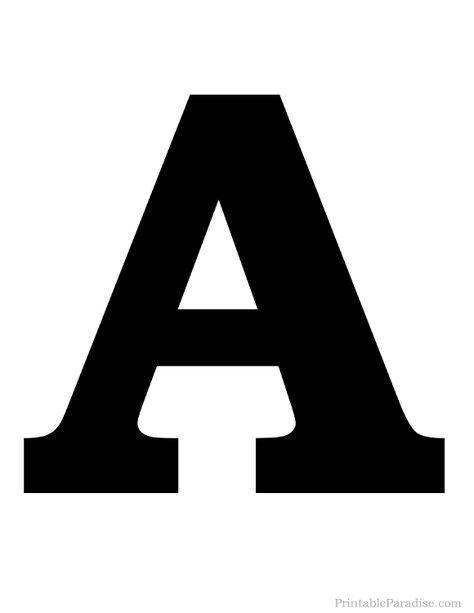

In [ ]:
import PIL
from PIL import ImageDraw
im = PIL.Image.open("/content/A.jpg")
im

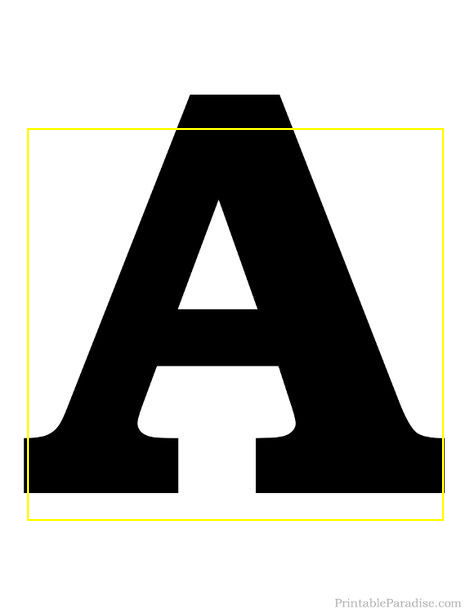

In [ ]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)

### EasyOCR cho 1 hóa đơn

#### Full version + sound

In [ ]:
import easyocr
from gtts import gTTS
import os

# Khởi tạo EasyOCR cho tiếng Anh
reader = easyocr.Reader(['en'])

# Đọc văn bản từ ảnh
bounds = reader.readtext('/content/bill.jpg')

# Khởi tạo chuỗi chứa toàn bộ văn bản
all_text = ""

# Hiển thị và xử lý kết quả
for bbox, text, conf in bounds:
    # Ép kiểu tất cả tọa độ về int
    clean_bbox = [[int(x), int(y)] for [x, y] in bbox]

    # Thêm vào chuỗi văn bản để tạo âm thanh
    all_text += text + ". "

    # In từng dòng
    print("Văn bản:", text)
    print("Độ tin cậy:", round(conf, 4))
    print("Tọa độ:", clean_bbox)
    print("-" * 40)

# Nếu có văn bản, tạo file âm thanh
if all_text.strip():
    tts = gTTS(text=all_text, lang='en')
    tts.save("/content/bill_audio (easyocr).mp3")
    print("Đã lưu file âm thanh: /content/bill_audio (easyocr).mp3")
else:
    print("Không có văn bản để tạo âm thanh.")

Văn bản: INVOICE
Độ tin cậy: 0.9999
Tọa độ: [[756, 28], [884, 28], [884, 60], [756, 60]]
----------------------------------------
Văn bản: My Company
Độ tin cậy: 0.9723
Tọa độ: [[137, 152], [219, 152], [219, 170], [137, 170]]
----------------------------------------
Văn bản: Invoice Number:
Độ tin cậy: 0.9607
Tọa độ: [[709, 151], [809, 151], [809, 169], [709, 169]]
----------------------------------------
Văn bản: INV-1258
Độ tin cậy: 0.8896
Tọa độ: [[813, 153], [867, 153], [867, 167], [813, 167]]
----------------------------------------
Văn bản: Gregory E: Willis
Độ tin cậy: 0.5358
Tọa độ: [[136, 168], [239, 168], [239, 188], [136, 188]]
----------------------------------------
Văn bản: PO Number:
Độ tin cậy: 0.9956
Tọa độ: [[731, 169], [809, 169], [809, 183], [731, 183]]
----------------------------------------
Văn bản: 6258 Amesbury St
Độ tin cậy: 0.9739
Tọa độ: [[137, 183], [253, 183], [253, 201], [137, 201]]
----------------------------------------
Văn bản: Invoioe Date: 24-Dec-20

#### Text Detection

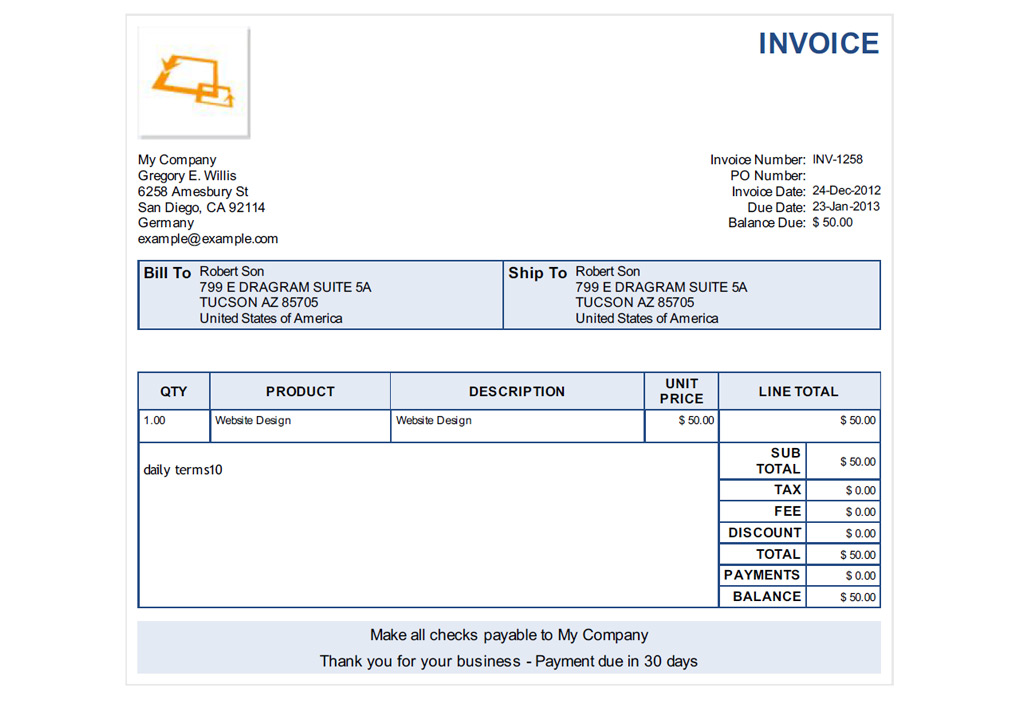

In [ ]:
import PIL
from PIL import ImageDraw
im = PIL.Image.open("/content/bill.jpg")
im

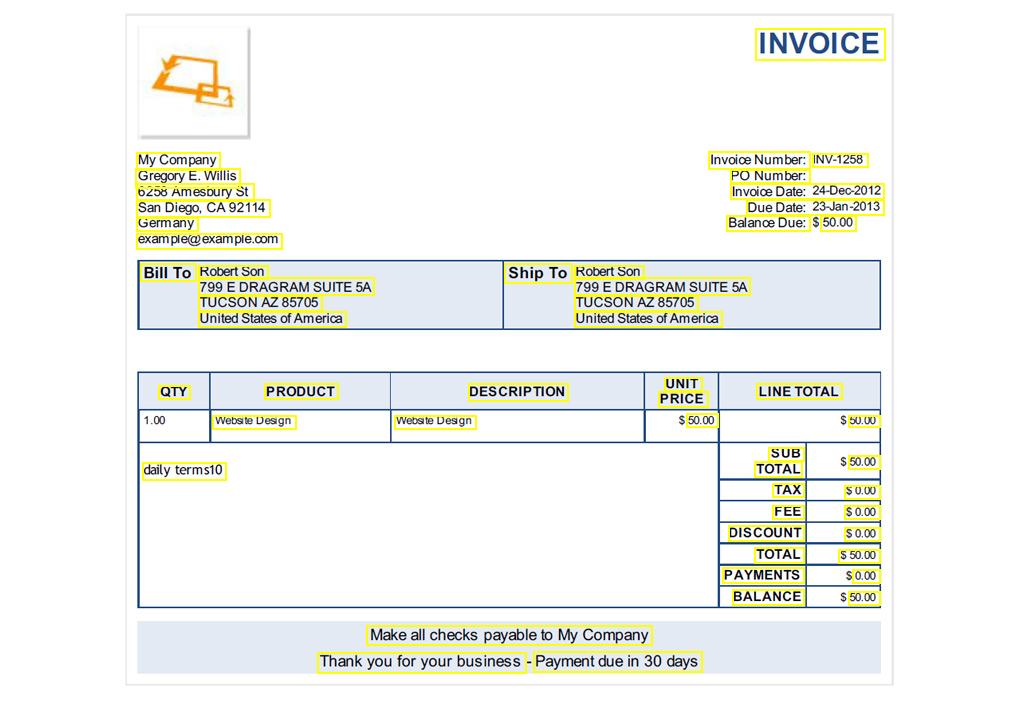

In [ ]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)

#### Data Mining

In [ ]:
import easyocr
import os
import pandas as pd
import gc
import torch

# Khởi tạo EasyOCR Reader (có thể thêm 'vi' nếu hóa đơn có tiếng Việt)
reader = easyocr.Reader(['en'])

# Thư mục chứa ảnh hóa đơn
invoice_folder = '/content/bills'
invoice_files = sorted([f for f in os.listdir(invoice_folder) if f.lower().endswith(('.jpg', '.png', '.jpeg'))])

# Danh sách lưu kết quả
results = []

# Xử lý từng hóa đơn
for bill_id, file in enumerate(invoice_files[:10], start=1):
    path = os.path.join(invoice_folder, file)
    print(f"Đang xử lý hóa đơn {bill_id}: {file}")

    try:
        # OCR
        ocr_result = reader.readtext(path)

        # Ghép các dòng text lại thành một đoạn văn
        text_items = ' '.join([text for _, text, _ in ocr_result])

        # Lưu vào danh sách
        results.append({
            'bill_id': bill_id,
            'items': text_items
        })

    except Exception as e:
        print(f"Lỗi khi xử lý {file}: {e}")
        results.append({
            'bill_id': bill_id,
            'items': '[ERROR]'
        })

    # Giải phóng RAM/VRAM
    del ocr_result
    torch.cuda.empty_cache()
    gc.collect()

# Ghi ra file CSV
df = pd.DataFrame(results)
df.to_csv('/content/bill_sequences (easyocr).csv', index=False, encoding='utf-8-sig')

print("\nĐã lưu kết quả vào file 'bill_sequences (easyocr).csv'.")

Progress: |██████████████████████████████████████████████████| 100.0% CompleteĐang xử lý hóa đơn 1: 1.jpg
Đang xử lý hóa đơn 2: 10.jpg
Đang xử lý hóa đơn 3: 2.jpg
Đang xử lý hóa đơn 4: 3.jpg
Đang xử lý hóa đơn 5: 4.jpg
Đang xử lý hóa đơn 6: 5.jpg
Đang xử lý hóa đơn 7: 6.jpg
Đang xử lý hóa đơn 8: 7.jpg
Đang xử lý hóa đơn 9: 8.jpg
Đang xử lý hóa đơn 10: 9.jpg

Đã lưu kết quả vào file 'bill_sequences (easyocr).csv'.


##### File csv cũng được chỉnh sửa bên ngoài do chỉ là ứng dụng phát hiện + nhận diện chữ để áp vào data mining

In [ ]:
import pandas as pd
from prefixspan import PrefixSpan

# Đọc file CSV
df = pd.read_csv('/content/bill_sequences (easyocr - edited).csv')

# Lấy danh sách các cột item
item_cols = [col for col in df.columns if col.startswith('item_')]

# Tạo list sequence từ từng dòng
sequences = df[item_cols].fillna('').values.tolist()
sequences = [[item for item in row if item] for row in sequences]

# Khai thác mẫu tuần tự bằng PrefixSpan
ps = PrefixSpan(sequences)

# Ví dụ: các pattern xuất hiện ít nhất 2 lần
results = ps.frequent(minsup=1)

# In kết quả
for support, pattern in results:
    print(f"Số lần xuất hiện: {support} | Pattern: {pattern}")

Số lần xuất hiện: 1 | Pattern: ['Dell Optiplex SFF Desktop Computer Windows 10 4GB 160GB']
Số lần xuất hiện: 1 | Pattern: ['Dell Optiplex SFF Desktop Computer Windows 10 4GB 160GB', 'Dell Desktop ComputerDIntel, Core 2 Duo, 8GB RAM, 1TB HDD, Windows 10, 22" LCD, Wifi']
Số lần xuất hiện: 1 | Pattern: ['Dell Optiplex SFF Desktop Computer Windows 10 4GB 160GB', 'Dell Desktop ComputerDIntel, Core 2 Duo, 8GB RAM, 1TB HDD, Windows 10, 22" LCD, Wifi', 'HP 6200 Pro, Core i7 3.4GHz, Quad Core, 16GB RAM, 500GB HDD']
Số lần xuất hiện: 1 | Pattern: ['Dell Optiplex SFF Desktop Computer Windows 10 4GB 160GB', 'Dell Desktop ComputerDIntel, Core 2 Duo, 8GB RAM, 1TB HDD, Windows 10, 22" LCD, Wifi', 'HP 6200 Pro, Core i7 3.4GHz, Quad Core, 16GB RAM, 500GB HDD', 'Vintage Microsolutions Pentium, 133MHz, Desktop Tower PC, Windows 95, 5.25" Floppy']
Số lần xuất hiện: 1 | Pattern: ['Dell Optiplex SFF Desktop Computer Windows 10 4GB 160GB', 'Dell Desktop ComputerDIntel, Core 2 Duo, 8GB RAM, 1TB HDD, Windows 1

## KerasOCR

### Cài đặt KerasOCR

In [ ]:
!pip install -r requirements.txt

  Using cached scipy-1.13.1-cp39-cp39-win_amd64.whl.metadata (60 kB)
  Using cached matplotlib-3.9.4-cp39-cp39-win_amd64.whl.metadata (11 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
INFO: pip is looking at multiple versions of opencv-python to determine which version is compatible with other requirements. This could take a while.
  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached contourpy-1.3.0-cp39-cp39-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.7-cp39-cp39-win_amd64.whl.metadata (6.4 kB)
  Using cached importlib_resources-6.5.2-py3-none-any.whl.metadata (3.9 kB)
   ---------------------------------------- 0.0/14.9 MB ? eta -:--:--
    --------------------------------------- 0.3/14.9 MB ? eta -:--:--
   - -------------------------------------- 0.5/14.9 MB 1

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
mediapipe 0.10.21 requires attrs>=19.1.0, which is not installed.
mediapipe 0.10.21 requires sentencepiece, which is not installed.


In [ ]:
!pip install keras-ocr

In [ ]:
!pip install gTTS

  Using cached gTTS-2.5.4-py3-none-any.whl.metadata (4.1 kB)
Using cached gTTS-2.5.4-py3-none-any.whl (29 kB)

   ---------------------------------------- 2/2 [gTTS]



### KerasOCR cho một kí tự

#### Full version + sound

Looking for C:\Users\phamd\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\phamd\.keras-ocr\crnn_kurapan.h5
1/1 [==============================] - 2s 2s/step
Văn bản: printableparadise
Bounding box: [[333.99997 597.99994]
 [437.99997 597.99994]
 [437.99997 608.99994]
 [333.99997 608.99994]]
Văn bản: com
Bounding box: [[438. 600.]
 [462. 600.]
 [462. 609.]
 [438. 609.]]
Đã lưu file âm thanh: A_audio (kerasocr).mp3


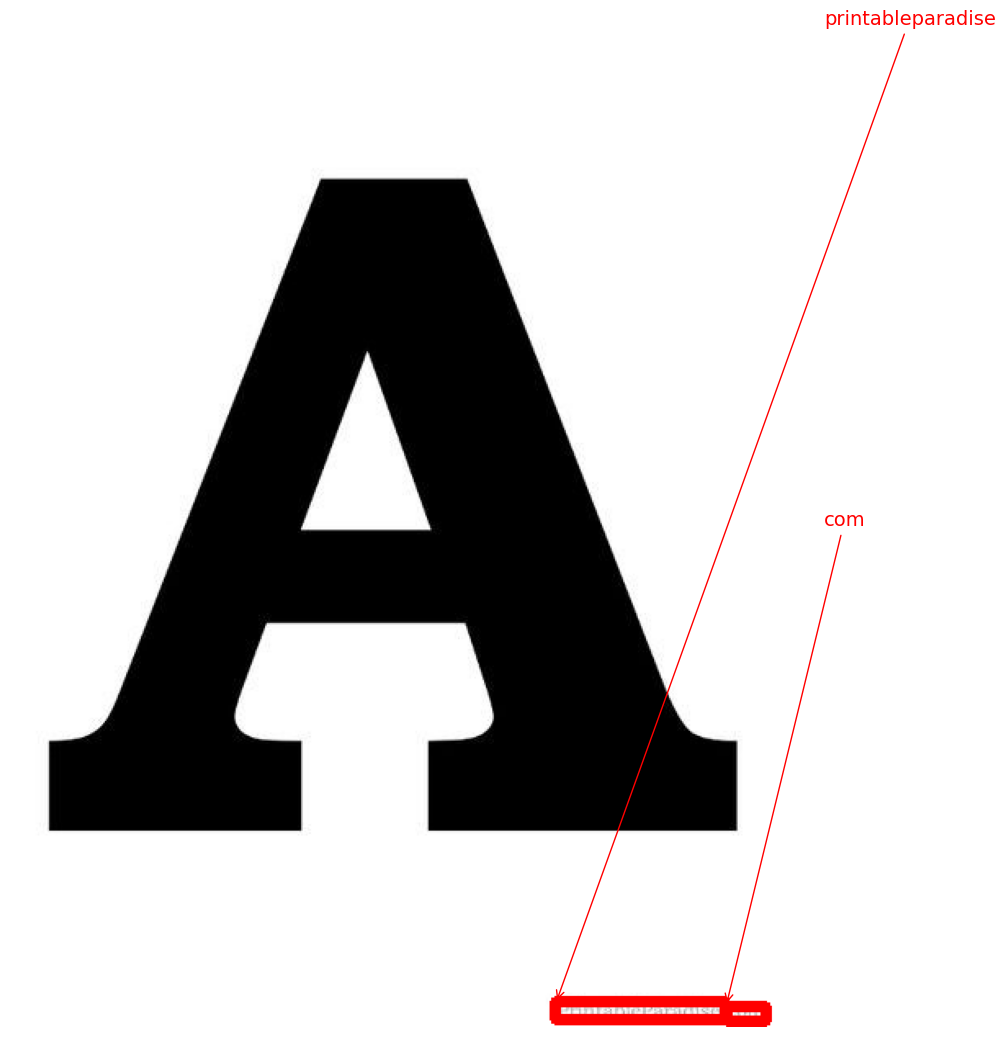

In [ ]:
from gtts import gTTS
import keras_ocr
import matplotlib.pyplot as plt

# Khởi tạo pipeline
pipeline = keras_ocr.pipeline.Pipeline()

# Đọc ảnh
image = [keras_ocr.tools.read('A.jpg')]

# Nhận diện văn bản
prediction = pipeline.recognize(image)

# Gộp toàn bộ văn bản vào một chuỗi
all_text = ""
for text, box in prediction[0]:
    print("Văn bản:", text)
    print("Bounding box:", box)
    all_text += text + ". "  # Thêm dấu chấm cho dễ nghe

# Chuyển văn bản sang âm thanh bằng gTTS
if all_text.strip():
    tts = gTTS(text=all_text, lang='en')  # Nếu là tiếng Việt thì dùng 'vi'
    tts.save("A_output/A_audio (kerasocr).mp3")
    print("Đã lưu file âm thanh: A_audio (kerasocr).mp3")
else:
    print("Không có văn bản để chuyển thành âm thanh.")

# Hiển thị ảnh với chú thích
fig, ax = plt.subplots(figsize=(10, 20))
keras_ocr.tools.drawAnnotations(image=image[0], predictions=prediction[0], ax=ax)
plt.axis('off')
plt.show()

#### Text Detection

In [ ]:
import keras_ocr
import matplotlib.pyplot as plt

In [ ]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for C:\Users\phamd\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\phamd\.keras-ocr\crnn_kurapan.h5


In [ ]:
image = [keras_ocr.tools.read('A.jpg')]

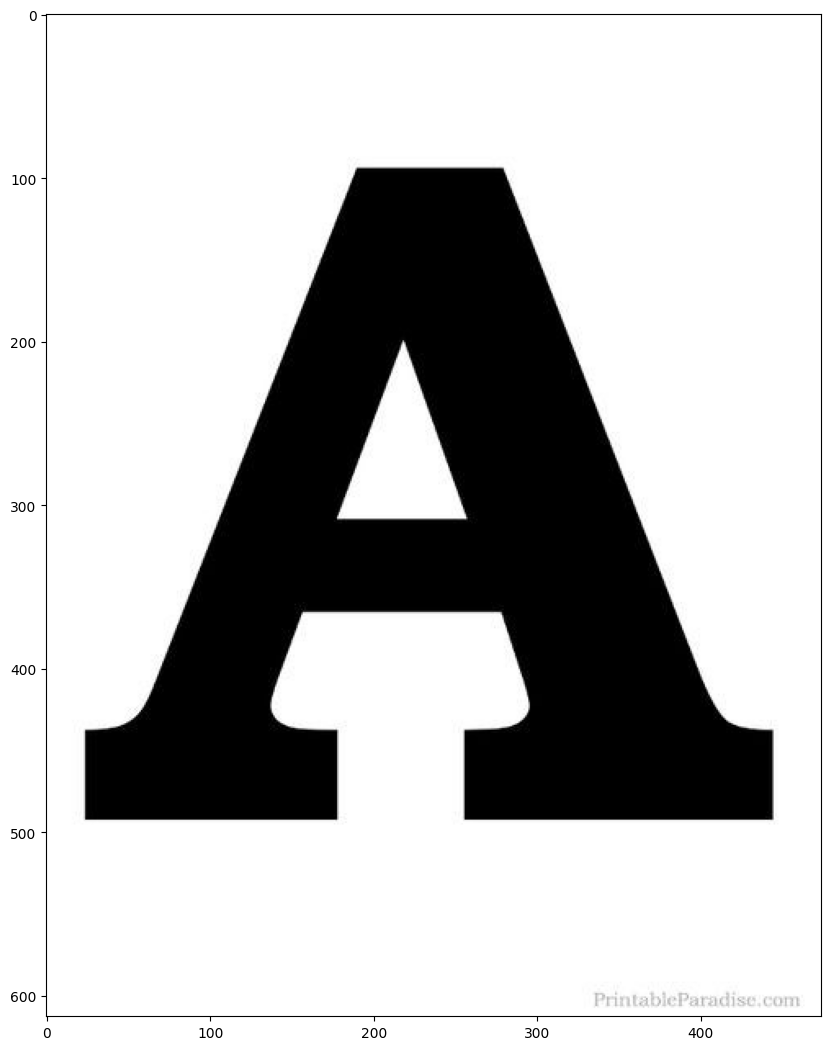

In [ ]:
plt.figure(figsize = (10,20))
plt.imshow(image[0])

In [ ]:
prediction = pipeline.recognize(image)
for text, box in prediction[0]:
    print("Văn bản:", text)
    print("Bounding box:", box)

1/1 [==============================] - 2s 2s/step
Văn bản: printableparadise
Bounding box: [[333.99997 597.99994]
 [437.99997 597.99994]
 [437.99997 608.99994]
 [333.99997 608.99994]]
Văn bản: com
Bounding box: [[438. 600.]
 [462. 600.]
 [462. 609.]
 [438. 609.]]


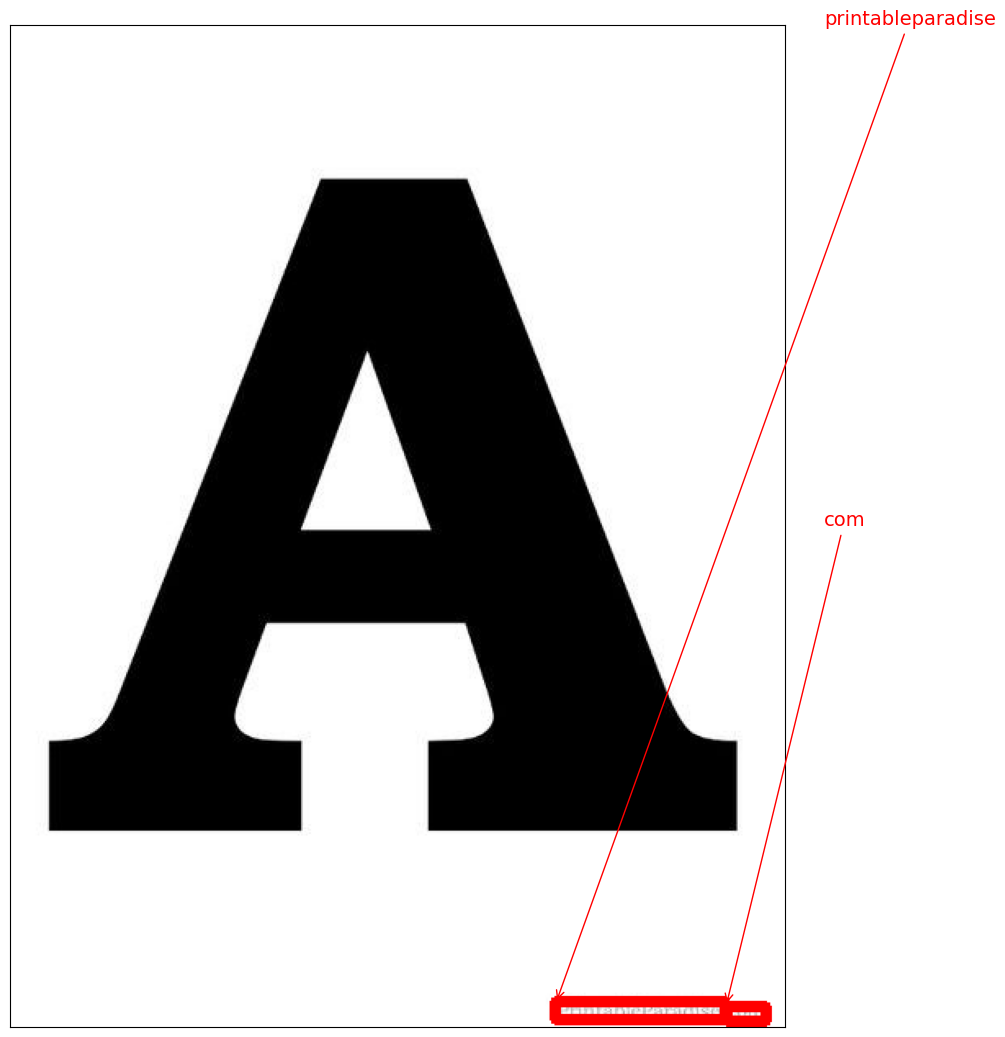

In [ ]:
# Hiển thị ảnh và vẽ kết quả nhận diện
fig, ax = plt.subplots(figsize=(10, 20))

# image và prediction là list có 1 phần tử, nên dùng image[0], prediction[0]
keras_ocr.tools.drawAnnotations(
    image=image[0],
    predictions=prediction[0],
    ax=ax
)

plt.show()

### KerasOCR cho 1 hóa đơn

#### Full version + sound

Looking for C:\Users\phamd\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\phamd\.keras-ocr\crnn_kurapan.h5
4/4 [==============================] - 8s 2s/step
Văn bản: invoice
Bounding box: [[760.  31.]
 [883.  31.]
 [883.  56.]
 [760.  56.]]
Văn bản: company
Bounding box: [[159.08864 152.6957 ]
 [219.38408 155.01476]
 [218.83904 169.18611]
 [158.5436  166.86705]]
Văn bản: number
Bounding box: [[755.11285 152.72803]
 [807.361   154.5297 ]
 [806.9311  166.99762]
 [754.6829  165.19595]]
Văn bản: inv1258
Bounding box: [[812. 153.]
 [866. 153.]
 [866. 166.]
 [812. 166.]]
Văn bản: my
Bounding box: [[138. 154.]
 [158. 154.]
 [158. 168.]
 [138. 168.]]
Văn bản: invoice
Bounding box: [[710. 154.]
 [753. 154.]
 [753. 166.]
 [710. 166.]]
Văn bản: willis
Bounding box: [[204. 169.]
 [238. 169.]
 [238. 182.]
 [204. 182.]]
Văn bản: po
Bounding box: [[731. 169.]
 [752. 169.]
 [752. 182.]
 [731. 182.]]
Văn bản: number
Bounding box: [[755.1128  168.72803]
 [808.2909  170.56177]
 [807.86096 183.0297 ]
 [

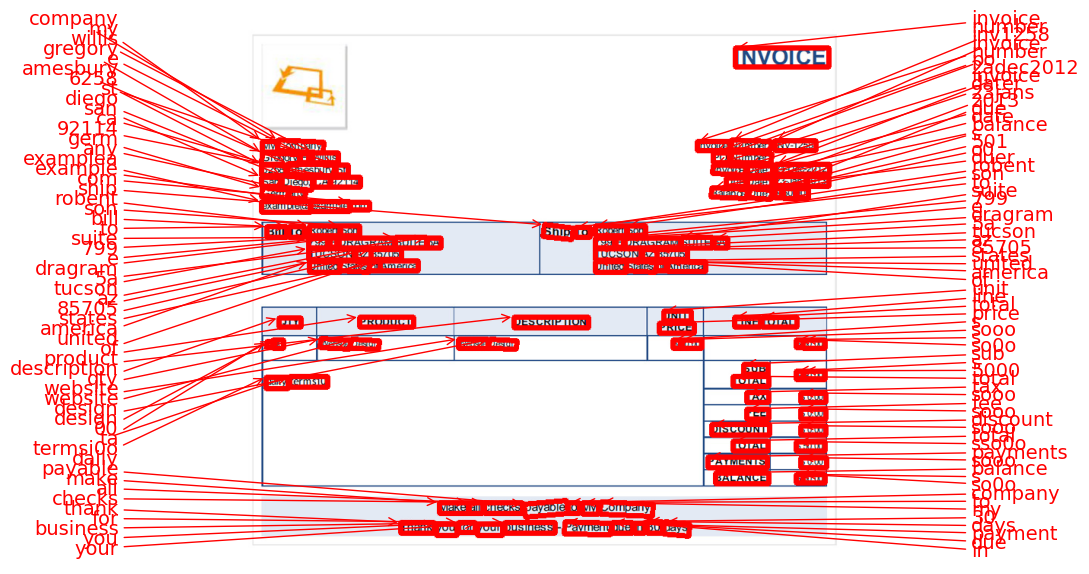

In [ ]:
from gtts import gTTS
import keras_ocr
import matplotlib.pyplot as plt

# Khởi tạo pipeline
pipeline = keras_ocr.pipeline.Pipeline()

# Đọc ảnh
image = [keras_ocr.tools.read('bill.jpg')]

# Nhận diện văn bản
prediction = pipeline.recognize(image)

# Gộp toàn bộ văn bản vào một chuỗi
all_text = ""
for text, box in prediction[0]:
    print("Văn bản:", text)
    print("Bounding box:", box)
    all_text += text + ". "  # Thêm dấu chấm cho dễ nghe

# Chuyển văn bản sang âm thanh bằng gTTS
if all_text.strip():
    tts = gTTS(text=all_text, lang='en')  # Nếu là tiếng Việt thì dùng 'vi'
    tts.save("bill_output/bill_audio (kerasocr).mp3")
    print("Đã lưu file âm thanh: bill_audio (kerasocr).mp3")
else:
    print("Không có văn bản để chuyển thành âm thanh.")

# Hiển thị ảnh với chú thích
fig, ax = plt.subplots(figsize=(10, 20))
keras_ocr.tools.drawAnnotations(image=image[0], predictions=prediction[0], ax=ax)
plt.axis('off')
plt.show()

#### Text Detection

In [ ]:
image = [keras_ocr.tools.read('bill.jpg')]

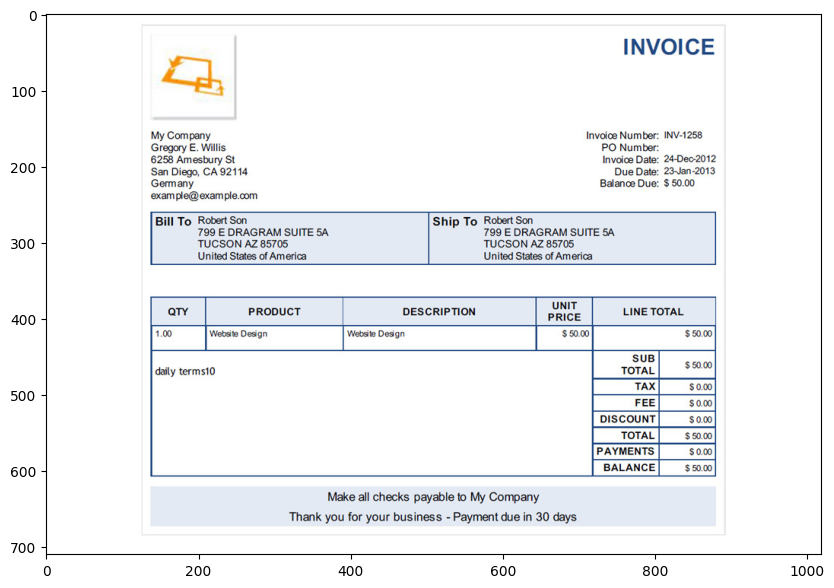

In [ ]:
plt.figure(figsize = (10,20))
plt.imshow(image[0])

In [ ]:
prediction = pipeline.recognize(image)
for text, box in prediction[0]:
    print("Văn bản:", text)
    print("Bounding box:", box)

4/4 [==============================] - 7s 2s/step
Văn bản: invoice
Bounding box: [[760.  31.]
 [883.  31.]
 [883.  56.]
 [760.  56.]]
Văn bản: company
Bounding box: [[159.08864 152.6957 ]
 [219.38408 155.01476]
 [218.83904 169.18611]
 [158.5436  166.86705]]
Văn bản: number
Bounding box: [[755.11285 152.72803]
 [807.361   154.5297 ]
 [806.9311  166.99762]
 [754.6829  165.19595]]
Văn bản: inv1258
Bounding box: [[812. 153.]
 [866. 153.]
 [866. 166.]
 [812. 166.]]
Văn bản: my
Bounding box: [[138. 154.]
 [158. 154.]
 [158. 168.]
 [138. 168.]]
Văn bản: invoice
Bounding box: [[710. 154.]
 [753. 154.]
 [753. 166.]
 [710. 166.]]
Văn bản: willis
Bounding box: [[204. 169.]
 [238. 169.]
 [238. 182.]
 [204. 182.]]
Văn bản: po
Bounding box: [[731. 169.]
 [752. 169.]
 [752. 182.]
 [731. 182.]]
Văn bản: number
Bounding box: [[755.1128  168.72803]
 [808.2909  170.56177]
 [807.86096 183.0297 ]
 [754.68286 181.19595]]
Văn bản: gregory
Bounding box: [[138.05318 169.61746]
 [187.40324 171.51553]
 [186.8463

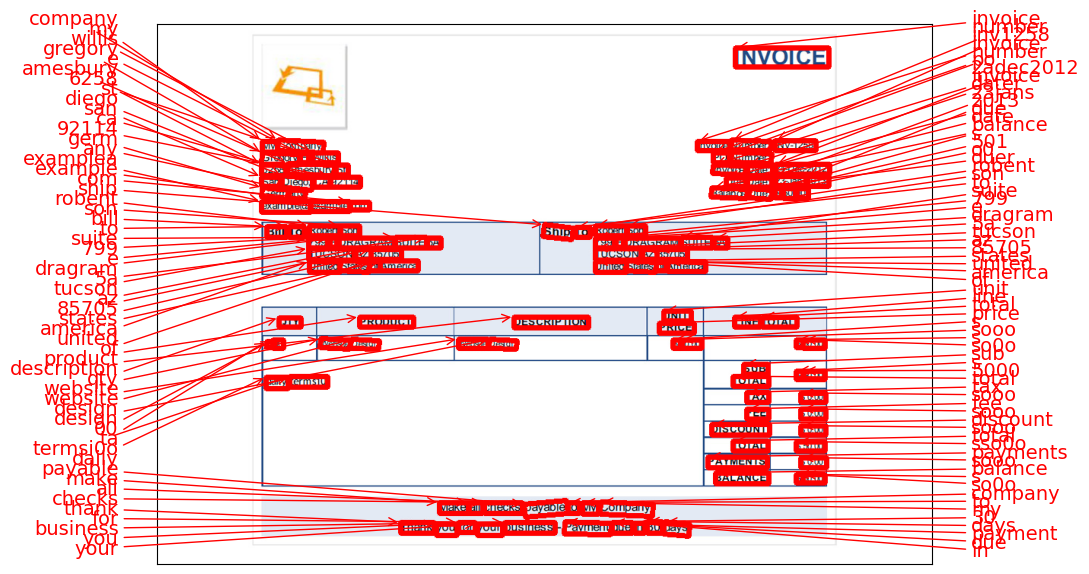

In [ ]:
# Hiển thị ảnh và vẽ kết quả nhận diện
fig, ax = plt.subplots(figsize=(10, 20))

# image và prediction là list có 1 phần tử, nên dùng image[0], prediction[0]
keras_ocr.tools.drawAnnotations(
    image=image[0],
    predictions=prediction[0],
    ax=ax
)

plt.show()

#### Data mining

In [ ]:
import keras_ocr
import pandas as pd
import os
import gc
import tensorflow as tf

image_folder = "bills"
image_files = [f for f in os.listdir(image_folder)
               if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

pipeline = keras_ocr.pipeline.Pipeline()

rows = []
for file_name in image_files:
    # Đọc và OCR từng ảnh
    image = keras_ocr.tools.read(os.path.join(image_folder, file_name))
    prediction = pipeline.recognize([image])[0]
    texts = [file_name] + [text for text, _ in prediction]
    rows.append(texts)

# Tạo DataFrame
df = pd.DataFrame(rows)
df.to_csv("bill_sequences (kerasocr).csv", index=False, header=False, encoding="utf-8-sig")
print("Đã xử lý xong", len(image_files), "hóa đơn!")

# Giải phóng tài nguyên
del pipeline
gc.collect()
tf.keras.backend.clear_session()

Looking for C:\Users\phamd\.keras-ocr\craft_mlt_25k.h5
Looking for C:\Users\phamd\.keras-ocr\crnn_kurapan.h5
8/8 [==============================] - 12s 2s/step


: 

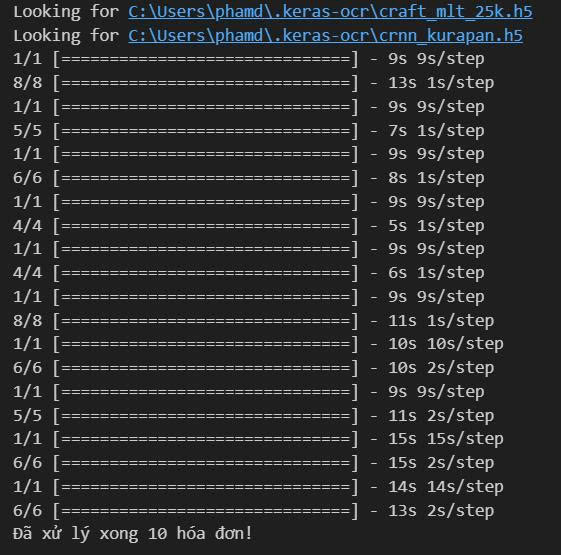

##### Do chạy hai lần bị crash nên nó ra lỗi tải quá tài nguyên. Hình trên là hình chạy thành công ở lần 1
##### Bên dưới là data mining nhưng file csv là đã tự sửa lại bên ngoài (do chỉ là ứng dụng cho phát hiện + nhận diện văn bản có trong ảnh nên phần file csv em làm bên ngoài để thể hiện data mining)

In [ ]:
import pandas as pd
from prefixspan import PrefixSpan

# Đọc file CSV
df = pd.read_csv('/content/bill_sequences (kerasocr - edited).csv')

# Lấy danh sách các cột item
item_cols = [col for col in df.columns if col.startswith('item_')]

# Tạo list sequence từ từng dòng
sequences = df[item_cols].fillna('').values.tolist()
sequences = [[item for item in row if item] for row in sequences]

# Khai thác mẫu tuần tự bằng PrefixSpan
ps = PrefixSpan(sequences)

# Ví dụ: các pattern xuất hiện ít nhất 2 lần
results = ps.frequent(minsup=1)

# In kết quả
for support, pattern in results:
    print(f"Số lần xuất hiện: {support} | Pattern: {pattern}")

Số lần xuất hiện: 1 | Pattern: ['optiplex dell sff desktop windows 10 computer 4gb 160gb']
Số lần xuất hiện: 1 | Pattern: ['optiplex dell sff desktop windows 10 computer 4gb 160gb', 'dell desktop computerIntel core 2 duo 8gb 1tb hd windows 10 pc 22 lcd wifi']
Số lần xuất hiện: 1 | Pattern: ['optiplex dell sff desktop windows 10 computer 4gb 160gb', 'dell desktop computerIntel core 2 duo 8gb 1tb hd windows 10 pc 22 lcd wifi', 'hp 6200 pro core 17 34 ghz quad core 16gb 500gb computer']
Số lần xuất hiện: 1 | Pattern: ['optiplex dell sff desktop windows 10 computer 4gb 160gb', 'dell desktop computerIntel core 2 duo 8gb 1tb hd windows 10 pc 22 lcd wifi', 'hp 6200 pro core 17 34 ghz quad core 16gb 500gb computer', 'vintage microsolutions pentium 133mhz desktop tower pc windows 95 525 floppy']
Số lần xuất hiện: 1 | Pattern: ['optiplex dell sff desktop windows 10 computer 4gb 160gb', 'dell desktop computerIntel core 2 duo 8gb 1tb hd windows 10 pc 22 lcd wifi', 'hp 6200 pro core 17 34 ghz quad 